In [43]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

In [44]:
service = QiskitRuntimeService(instance='ibm-q/open/main')
backends = service.backends()
print(backends)

[<IBMBackend('simulator_statevector')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_lima')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_mps')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_quito')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_nairobi')>]


In [45]:
import qiskit
# help(qiskit)

Help on package qiskit:

NAME
    qiskit - Main Qiskit public functionality.

PACKAGE CONTENTS
    _accelerate
    _qasm2
    algorithms (package)
    assembler (package)
    circuit (package)
    compiler (package)
    converters (package)
    dagcircuit (package)
    exceptions
    execute_function
    extensions (package)
    namespace
    opflow (package)
    primitives (package)
    providers (package)
    pulse (package)
    qasm (package)
    qasm2 (package)
    qasm3 (package)
    qobj (package)
    qpy (package)
    quantum_info (package)
    result (package)
    scheduler (package)
    synthesis (package)
    test (package)
    tools (package)
    transpiler (package)
    user_config
    utils (package)
    version
    visualization (package)

SUBMODULES
    _user_config

CLASSES
    builtins.Exception(builtins.BaseException)
        qiskit.exceptions.QiskitError
            qiskit.exceptions.MissingOptionalLibraryError(qiskit.exceptions.QiskitError, builtins.ImportError)
   

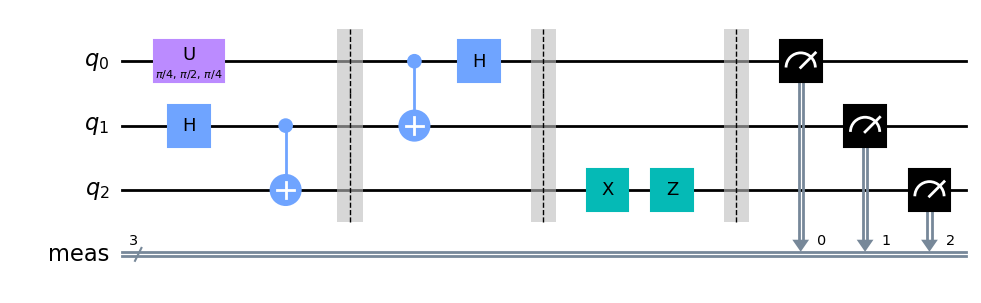

In [46]:
qc_tp = QuantumCircuit(3)
from math import pi
theta = pi/4
phi = pi/2
lambda_param = pi/4
qc_tp.u(theta, phi, lambda_param, 0)
qc_tp.h(1)
qc_tp.cx(1,2)
qc_tp.barrier()
qc_tp.cx(0,1)
qc_tp.h(0)
qc_tp.barrier()
qc_tp.x(2)
qc_tp.z(2)
qc_tp.measure_all()
qc_tp.draw('mpl')

In [47]:
job = Sampler(session='ibmq_qasm_simulator').run(qc_tp)

In [53]:
job.result()

SamplerResult(quasi_dists=[{1: 0.04, 6: 0.034, 4: 0.2205, 5: 0.21175, 2: 0.21575, 7: 0.03475, 0: 0.036, 3: 0.20725}], metadata=[{'shots': 4000}])

In [51]:
counts = job.result()
print(counts)

SamplerResult(quasi_dists=[{1: 0.04, 6: 0.034, 4: 0.2205, 5: 0.21175, 2: 0.21575, 7: 0.03475, 0: 0.036, 3: 0.20725}], metadata=[{'shots': 4000}])


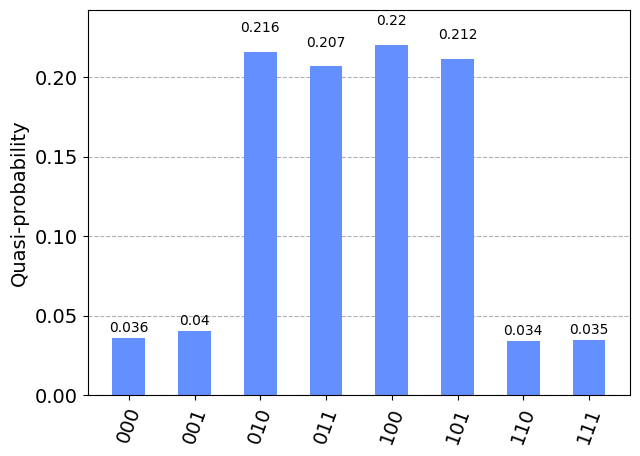

In [54]:
counts = job.result().quasi_dists[0].binary_probabilities()
from qiskit.visualization import plot_histogram
plot_histogram(counts)